In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



In [2]:
# Load the dataset
file_path = 'retail_sales_dataset.csv'
data = pd.read_csv(file_path)

# View the first 100 rows of the dataset
data.head(9999)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [3]:
data.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
data.tail()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


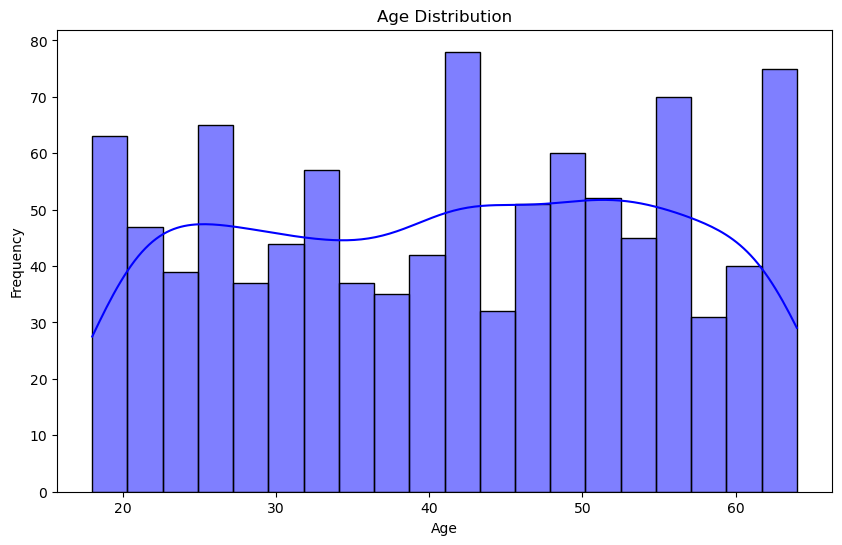

In [9]:



# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



## Jaantuska histogaraamku wuxuu muujinayaa sida da'du ugu kala qaybsan tahay xogta:

##### Barafka wuxuu muujinayaa tirada dadka ku jira koox kasta oo da' ah.
##### Khadka siman ee sare (KDE) wuxuu muujinayaa qaabka guud ee xogta, si sahlan loo fahmi karo.
##### Waxaa laga arki karaa halka ugu badan ee da'du isugu urursan tahay (bartamaha barafka ugu dheer).
##### Haddii jaantuska uu u muuqdo mid dheelitiran labada dhinacba, xogta si siman ayey u qaybsan tahay; haddii dhinac uu ka dheer yahay, xogtu waa qalloocan tahay.
##### Meelaha bannaan ama barafka aadka u dheer ee dhinacyada jaantuska waxay muujin karaan qiimayaal aad u sarreeya ama aad u hooseeya (outliers).
 ##### Tani waxay caawinaysaa in la ogaado sida da'du ugu badan tahay, inta ay kala fidsan tahay xogta, iyo haddii ay jiraan qiimayaal gaar ah oo caadi ahayn.

C:\Users\hp\AppData\Local\Temp\ipykernel_10144\236504401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


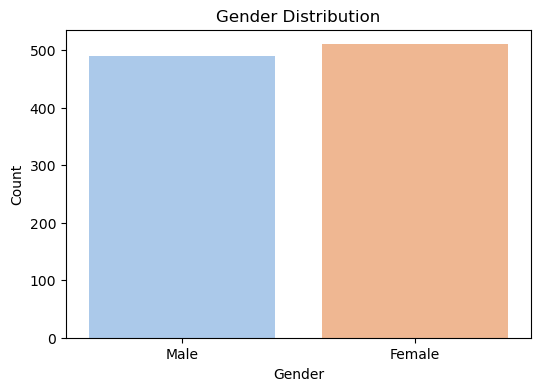

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



# Explanation:
The x-axis represents the categories of gender (e.g., Male, Female, or others, depending on your dataset).
The y-axis shows the number of occurrences (counts) for each gender.
Each bar's height indicates how many entries belong to that specific gender.
The pastel color palette makes the chart visually appealing.
# What it tells you:
Which gender is most or least represented in the dataset.
Whether the data is balanced across genders or skewed toward one gender.

C:\Users\hp\AppData\Local\Temp\ipykernel_10144\2337996766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product Category', data=data, palette='muted')


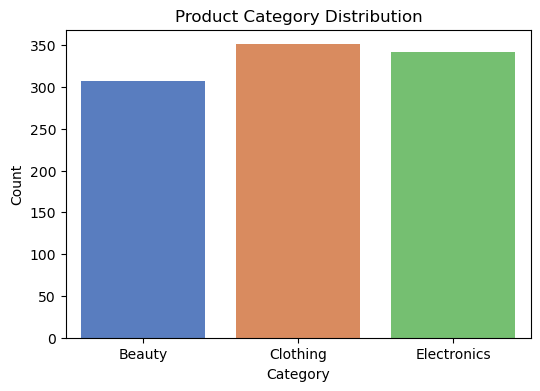

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Product Category', data=data, palette='muted')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



## Explanation:
The x-axis represents the different product categories (e.g., Electronics, Clothing, Food, etc.).
The y-axis shows the number of occurrences (counts) for each category.
Each bar's height indicates how many products belong to that specific category.
The muted color palette makes the chart visually distinct but subtle.
## Insights You Can Derive:
Identify which product category is most or least popular based on the counts.
Understand how balanced or imbalanced the dataset is across product categories.
Detect patterns, such as if certain categories dominate the dataset.

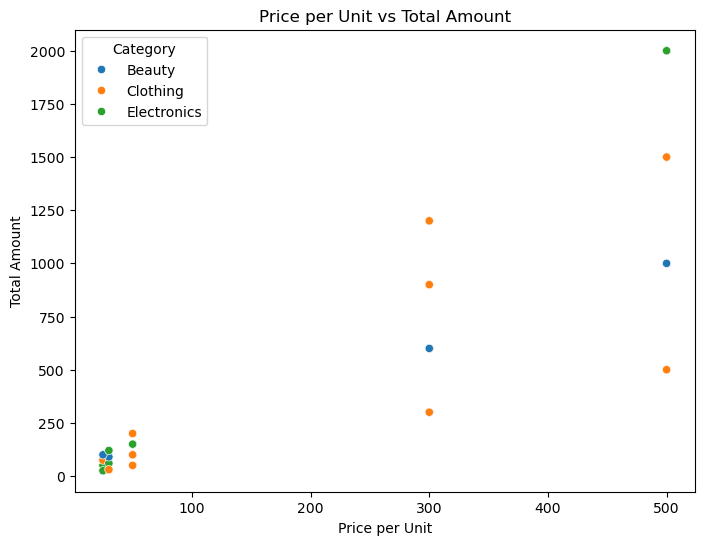

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price per Unit', y='Total Amount', hue='Product Category', data=data)
plt.title('Price per Unit vs Total Amount')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.legend(title='Category')
plt.show()



# Explanation:
x-axis: Represents the Price per Unit of products.
y-axis: Represents the Total Amount spent on products.
Dots: Each dot represents a product or transaction in the dataset.
Hue (colors): Different colors represent different product categories, helping to distinguish between them visually.
# What You Can Learn:
Relationship Between Variables:

Observe how Price per Unit correlates with the Total Amount (e.g., higher prices might lead to higher totals, depending on quantity).
Category-Specific Trends:

Identify if certain product categories are clustered in specific price or total amount ranges.
See which categories have higher variability in price or total amount.
Outliers:

Look for dots far from the main cluster; these might indicate unusually expensive products or large purchases.
# Insights:
This plot helps uncover patterns like which product categories dominate higher price or total ranges, if there's any clear trend, and whether any anomalies exist in the data.

In [13]:

# Subsetting data based on criteria: Age between 30-40 and Product Category 'Clothing'
subset_data = data[(data['Age'] >= 30) & (data['Age'] <= 40) & (data['Product Category'] == 'Clothing')]
subset_data


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
22,23,2023-04-12,CUST023,Female,35,Clothing,4,30,120
40,41,2023-02-22,CUST041,Male,34,Clothing,2,25,50
84,85,2023-02-06,CUST085,Male,31,Clothing,3,50,150
94,95,2023-11-24,CUST095,Female,32,Clothing,2,30,60
...,...,...,...,...,...,...,...,...,...
949,950,2023-11-07,CUST950,Male,36,Clothing,3,300,900
955,956,2023-08-19,CUST956,Male,30,Clothing,3,500,1500
968,969,2023-04-19,CUST969,Female,40,Clothing,3,300,900
986,987,2023-04-29,CUST987,Female,30,Clothing,3,300,900


In [14]:


# Building the regressioXn model
X = data[['Quantity', 'Price per Unit', 'Age']]
y = data['Total Amount']



In [15]:
X.count()

Quantity          1000
Price per Unit    1000
Age               1000
dtype: int64

In [16]:
y.count()

1000

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
X_train

,Quantity,Price per Unit,Age
29,3,300,39
535,4,30,55
695,4,50,50
557,1,25,41
836,3,30,18
...,...,...,...
106,4,300,21
270,4,30,62
860,3,30,41
435,4,30,57


In [19]:
X_test

,Quantity,Price per Unit,Age
521,3,500,46
737,2,50,41
740,1,300,48
660,4,25,44
411,4,500,19
...,...,...,...
408,3,300,21
332,4,300,54
208,4,50,30
613,4,300,39


In [20]:
y_train.count()

800

In [21]:
y_test.count()

200

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predictions and R^2 score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nR^2 Score:", r2)
print("Mean Squared Error:", mse)

# Model Coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


R^2 Score: 0.856877226425043
Mean Squared Error: 41896.213221343605

Model Coefficients:
Quantity: 179.5581083350571
Price per Unit: 2.4863119975516623
Age: -0.9042207276850672


# Waa kuwan natiijooyinka moodalkaaga dib-u-habaynta:

# Heerka R²: 0.855

Tani waxay muujinaysaa in qiyaastii 85.5% isbeddelka ku yimaada variable-ka la saadaaliyay ay sharxayaan variable-yada madaxbannaan ee moodalkaaga. Heerka R² ee u dhow 1 wuxuu tilmaamayaa in moodalku si wanaagsan u sharxayo xogta.

# Khaladka Celceliska Labajibbaaran (MSE): 40,652.66

MSE wuxuu cabbiraa celceliska farqiga labajibbaaran ee u dhexeeya qiimayaasha dhabta ah iyo kuwa saadaasha ah. Qiime hoose oo MSE ah wuxuu muujinayaa in moodalku leeyahay saxnaan wanaagsan.

# Isku-xirnaanta Moodalka:

Tirada: 184.733

Marka la eego in dhammaan variable-yada kale ay joogaan halkooda, kordhinta hal unug ee tirada waxay la xiriirtaa kordhin qiyaastii 184.733 unug ee variable-ka la saadaaliyay.

Qiimaha halkii Unug: 2.481

Kordhinta hal unug ee qiimaha halkii unug waxay la xiriirtaa kordhin qiyaastii 2.481 unug ee variable-ka la saadaaliyay, iyadoo la eego in variable-yada kale ay joogaan halkooda.

Da'da: -1.231

Kordhinta hal sano ee da'da waxay la xiriirtaa hoos u dhac qiyaastii 1.231 unug ee variable-ka la saadaaliyay, iyadoo la eego in variable-yada kale ay joogaan halkooda.

# Fiiro Gaar ah:

Isku-xirnaanta: Qiimayaashan waxay muujinayaan sida variable-yada madaxbannaan ay u saameeyaan variable-ka la saadaaliyay. Qiime togan wuxuu tilmaamayaa xiriir toos ah, halka qiime taban uu tilmaamayo xiriir lid ah.

Qiimaynta Moodalka: Heerka R² ee sareeya iyo MSE-ga hooseeya waxay muujinayaan in moodalkaagu yahay mid sax ah oo lagu kalsoonaan karo. Si kastaba ha ahaatee, waxaa muhiim ah in la hubiyo in moodalku buuxiyo shuruudaha lagama maarmaanka ah ee dib-u-habaynta, sida in khaladaadka ay si caadi ah u qaybsan yihiin iyo in ay jiraan xiriir toos ah oo u dhexeeya variable-yada.

In [24]:




# Model Coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")



Model Coefficients:
Quantity: 179.5581083350571
Price per Unit: 2.4863119975516623
Age: -0.9042207276850672
